In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
def my_softmax(z):
    ez = np.exp(z)
    sm = ez/np.sum(ez)
    return(sm)

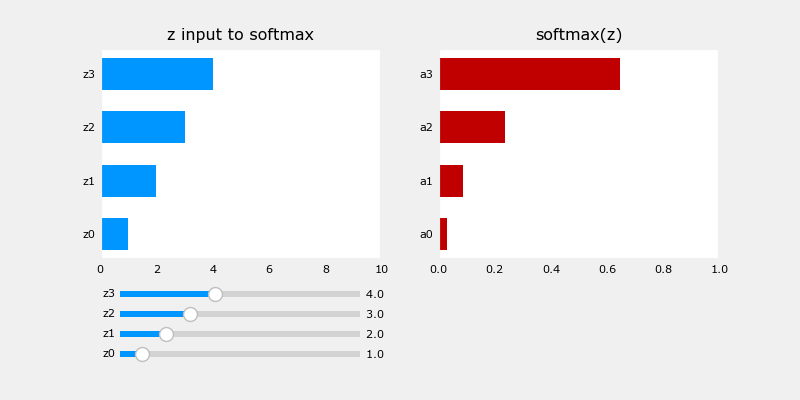

In [3]:
plt.close("all")
plt_softmax(my_softmax)

In [9]:
#Creating dataset

centers = [[-5,2], [-2,2], [1,2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [11]:
# Implementation with Softmax function in output layer

model = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='softmax')
    ]
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(
    X_train, y_train, epochs = 10
)

Epoch 1/10
63/63 [==============================] - 0s 1ms/step - loss: 0.9842
Epoch 2/10
63/63 [==============================] - 0s 968us/step - loss: 0.5608
Epoch 3/10
63/63 [==============================] - 0s 857us/step - loss: 0.4008
Epoch 4/10
63/63 [==============================] - 0s 937us/step - loss: 0.3225
Epoch 5/10
63/63 [==============================] - 0s 794us/step - loss: 0.2819
Epoch 6/10
63/63 [==============================] - 0s 794us/step - loss: 0.2561
Epoch 7/10
63/63 [==============================] - 0s 794us/step - loss: 0.2368
Epoch 8/10
63/63 [==============================] - 0s 794us/step - loss: 0.2218
Epoch 9/10
63/63 [==============================] - 0s 778us/step - loss: 0.2086
Epoch 10/10
63/63 [==============================] - 0s 1000us/step - loss: 0.1976


In [14]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred[:2])
print("Largest value: ", np.max(p_nonpreferred), "Smallest value: ", np.min(p_nonpreferred))

[[9.08e-05 1.30e-02 9.73e-01 1.42e-02]
 [9.39e-01 6.09e-02 7.61e-06 2.03e-06]]
Largest value:  0.9999957 Smallest value:  1.7948741e-10


In [19]:
#Optimized implementation with linear activation function

preferred_model = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='linear')
    ]
)

preferred_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)

preferred_model.fit(
    X_train, y_train,
    epochs = 10
)

Epoch 1/10
63/63 [==============================] - 0s 905us/step - loss: 1.0524
Epoch 2/10
63/63 [==============================] - 0s 921us/step - loss: 0.6471
Epoch 3/10
63/63 [==============================] - 0s 857us/step - loss: 0.4876
Epoch 4/10
63/63 [==============================] - 0s 873us/step - loss: 0.3853
Epoch 5/10
63/63 [==============================] - 0s 873us/step - loss: 0.3109
Epoch 6/10
63/63 [==============================] - 0s 857us/step - loss: 0.2680
Epoch 7/10
63/63 [==============================] - 0s 889us/step - loss: 0.2407
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2243
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2121
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1994


In [22]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("\nLargest value: ", np.max(p_preferred), "Smallest value: ", np.min(p_preferred))

two example output vectors:
 [[-4.74 -1.8   3.06 -0.18]
 [ 4.96  0.8  -4.86 -4.19]]

Largest value:  10.589512 Smallest value:  -10.859476


In [24]:
#Processing the output with softmax

sm_preferred = tf.nn.softmax(p_preferred).numpy()

print(f"two example output vectors:\n {sm_preferred[:2]}")
print("\nLargest value: ", np.max(sm_preferred), "Smallest value: ", np.min(sm_preferred))

two example output vectors:
 [[3.94e-04 7.41e-03 9.55e-01 3.74e-02]
 [9.85e-01 1.53e-02 5.33e-05 1.04e-04]]

Largest value:  0.99999774 Smallest value:  2.5754288e-09


In [26]:
#Selecting the most likely category

for i in range(5):
    print(f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-4.74 -1.8   3.06 -0.18], category: 2
[ 4.96  0.8  -4.86 -4.19], category: 0
[ 3.22  0.94 -3.44 -3.42], category: 0
[-1.68  2.57 -0.2  -4.38], category: 1
[-3.43  2.03  1.37 -4.54], category: 1
